In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

ImportError: dlopen(/Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/_pywrap_tfe.so, 2): Library not loaded: @rpath/_pywrap_tensorflow_internal.so
  Referenced from: /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/_pywrap_tfe.so
  Reason: image not found

In [3]:
dataset = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

# Splite data the X - Our data , and y - the prdict label
X = dataset.drop('label',axis = 1)
y = dataset['label']

Amount of each labels


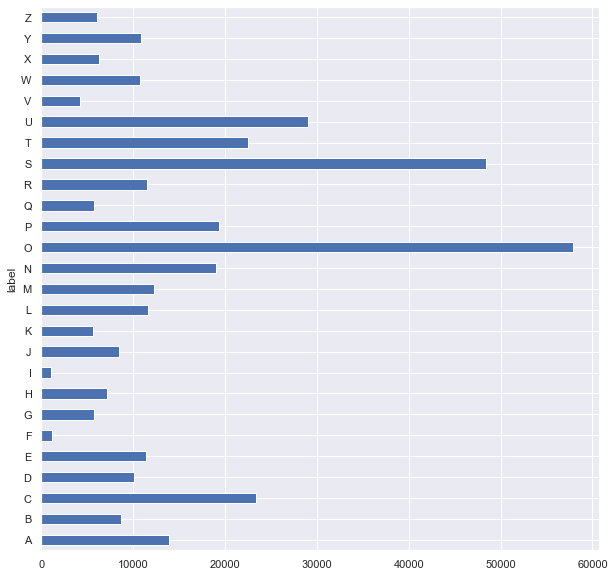

In [4]:
print("Amount of each labels")

# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(alphabets_mapper)

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

In [5]:
# splite the data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [7]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(y.unique()), activation='softmax'))

cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=256)

Epoch 1/20
1092/1092 [==============================] - 156s 141ms/step - loss: 0.5139 - accuracy: 0.8566 - val_loss: 0.0949 - val_accuracy: 0.9747
Epoch 2/20
1092/1092 [==============================] - 137s 125ms/step - loss: 0.0984 - accuracy: 0.9732 - val_loss: 0.0700 - val_accuracy: 0.9804
Epoch 3/20
1092/1092 [==============================] - 129s 118ms/step - loss: 0.0716 - accuracy: 0.9797 - val_loss: 0.0579 - val_accuracy: 0.9837
Epoch 4/20
1092/1092 [==============================] - 129s 118ms/step - loss: 0.0559 - accuracy: 0.9842 - val_loss: 0.0496 - val_accuracy: 0.9861
Epoch 5/20
1092/1092 [==============================] - 160s 146ms/step - loss: 0.0469 - accuracy: 0.9862 - val_loss: 0.0476 - val_accuracy: 0.9867
Epoch 6/20
1092/1092 [==============================] - 144s 132ms/step - loss: 0.0406 - accuracy: 0.9881 - val_loss: 0.0456 - val_accuracy: 0.9866
Epoch 7/20
1092/1092 [==============================] - 177s 162ms/step - loss: 0.0339 - accuracy: 0.9896 - val_

In [8]:
cls.save('my_model.h5')

In [9]:
import PIL
from PIL import Image, ImageEnhance, ImageDraw, ImageFont
from IPython.display import display
import numpy as np

In [10]:
img = Image.open('n_image copy.jpg')

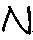

In [13]:
img

In [14]:
import cv2

In [19]:
my_lol_img = cv2.imread('n_image copy.jpg', cv2.IMREAD_GRAYSCALE)
my_lol_img = cv2.resize(my_lol_img, (28, 28))

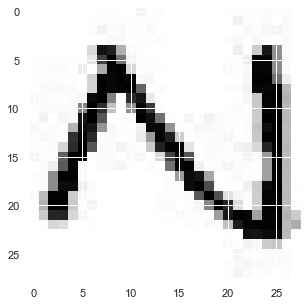

In [20]:
plt.figure(figsize = (5,5))
plt.imshow(my_lol_img, cmap='gray')

In [21]:
my_lol_img

array([[255, 255, 255, 255, 255, 255, 255, 253, 254, 254, 255, 244, 254,
        252, 255, 255, 255, 255, 255, 255, 251, 254, 254, 253, 250, 253,
        251, 254],
       [255, 255, 255, 255, 255, 255, 254, 253, 253, 252, 252, 254, 252,
        254, 255, 255, 255, 255, 255, 255, 255, 241, 254, 253, 250, 255,
        250, 254],
       [255, 255, 255, 255, 255, 255, 252, 242, 252, 250, 254, 254, 250,
        255, 255, 255, 255, 255, 255, 255, 254, 254, 249, 252, 247, 245,
        250, 255],
       [255, 255, 255, 255, 255, 255, 255, 254, 248, 249, 254, 252, 253,
        252, 255, 255, 255, 255, 255, 255, 250, 250, 253, 248, 251, 253,
        250, 254],
       [255, 255, 255, 255, 255, 255, 217,  18,  32, 176, 250, 254, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 239, 254, 205,  22, 146,
        251, 255],
       [253, 254, 253, 254, 254, 254, 229,  63,   0, 116, 243, 253, 252,
        254, 255, 255, 255, 255, 255, 255, 252, 253, 237,   7,   7, 141,
        249, 254],
       [25

In [22]:
my_lol_img.shape

(28, 28)

In [23]:
my_lol_img = np.array(my_lol_img) / 255
my_lol_img = my_lol_img.reshape(-1, 28, 28, 1)
#y_train = np.array(y_train)

In [28]:
my_lol_img

array([[[[1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.99215686],
         [0.99607843],
         [0.99607843],
         [1.        ],
         [0.95686275],
         [0.99607843],
         [0.98823529],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.98431373],
         [0.99607843],
         [0.99607843],
         [0.99215686],
         [0.98039216],
         [0.99215686],
         [0.98431373],
         [0.99607843]],

        [[1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [1.        ],
         [0.99607843],
         [0.99215686],
         [0.99215686],
         [0.98823529],
         [0.98823529],
         [0.99607843],
         [0.98823529],
         [0.99607843],
         [1.        ],
         

In [29]:
import keras

In [30]:
model = keras.models.load_model('my_model.h5')

In [31]:
my_lol_prediction = model.predict(my_lol_img)

In [32]:
my_lol_prediction

array([[1.1581924e-07, 4.1368559e-10, 6.4555923e-07, 2.2491538e-05,
        1.4397167e-12, 3.6010979e-15, 5.0695167e-11, 8.0478216e-08,
        3.4654861e-12, 6.4896874e-08, 1.4367749e-06, 8.8046843e-05,
        7.5111379e-06, 2.3038849e-01, 1.7430016e-06, 5.7561249e-09,
        4.5668517e-07, 4.1635683e-08, 5.5010565e-09, 1.1502559e-11,
        7.6300371e-01, 6.4844764e-03, 3.5521356e-07, 3.8272912e-08,
        2.2634480e-07, 2.1373243e-10]], dtype=float32)

In [38]:
max = my_lol_prediction[0][0];    
     
#Loop through the array    
for i in range(0, len(my_lol_prediction[0])):    
    #Compare elements of array with max    
   if(my_lol_prediction[0][i] > max):    
       max = my_lol_prediction[0][i];    
           
print("Largest element present in given array: " + str(max));   

Largest element present in given array: 0.7630037


In [39]:
for i in range(0, len(my_lol_prediction[0])):
    if(my_lol_prediction[0][i] == max):
        print(i)

20


In [42]:
mysum = 0
for i in range(0, len(my_lol_prediction[0])):
        mysum = mysum + my_lol_prediction[0][i]
print(mysum)

0.9999999418151907


In [43]:
my_lol_prediction_2 = np_utils.to_categorical(my_lol_prediction)

In [44]:
my_lol_prediction_2

array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]], dtype=float32)

In [45]:
my_lol_prediction_3 = model.predict(X_train[0])

ValueError: in user code:

    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/nishanthkrishna/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 1)


In [47]:
X_train[0].shape

(28, 28, 1)